In [12]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime
import glob, os
import seaborn as sns
import re
import matplotlib.pyplot as plt
from colorama import Fore

In [78]:
def clean(s):
    replacements = [".", ":", ",", "?", "!", "-", "(", ")", "–", ";", "/", "„", "“", "”", "\""]
    for r in replacements:
        s = s.replace(r, " ")
    whitespace = re.compile("\s+")
    s, _ = whitespace.subn(" ", s)
    return s.lower()

keywords={ 
    "no ed fridays":["no education", "schwänz[^\s]*"],
    "fff": ["friday[s]?\s?for\s?future"],
    "schulpflicht": ["schulpflicht"],
    "greta": ["(greta )+(thunberg)"],
    "annegret": ["kramp"]
         }

def df_from_xml(filename, keywords=keywords):
    tree = ET.parse(filename)
    root = tree.getroot()
    date = tree.find(".//datum").attrib["date"]
    nr = int(root.attrib["sitzung-nr"])
    #print(nr)
    #print("  ", date)

    
    data = {}
    dataframes = []
            
    day = int(date.split(".")[0])
    month = int(date.split(".")[1])
    year = int(date.split(".")[2])
    data["date"] = datetime.date(year, month, day)
    data["sdate"] = date
    data["smonth"] = f"{month}-{year}"
    data["day"] = day
    data["year"] = year
    data["month"] = month
    data["nr"] = nr
    
    for key, value in keywords.items():
        n = 0
        for word in value:
            matcher = re.compile("("+word+")")
            for p in root.findall(".//p"):
                text = ""
                if p.text is not None:
                    text = clean(p.text)
                found, num = matcher.subn(Fore.RED + r'\1' + Fore.RESET, text)
                if num > 0:
                    print(f"{key}: {num}")
                    print(found)
                    n += num
            
        data["word"] = key
        data["count"] = n
        dataframes.append(pd.DataFrame([data]))

    return dataframes

df = df_from_xml("data/19109-data.xml")
df

annegret: 1
für den bundespräsidenten hat mir der erste vizepräsident des bundesrats herr michael müller mitgeteilt dass er am 17 juli 2019 gemäß artikel 64 absatz 1 des grundgesetzes für die bundesrepublik deutschland auf vorschlag der frau bundeskanzlerin die bundesministerin der verteidigung frau dr ursula von der leyen aus ihrem amt als bundesministerin entlassen und frau annegret kramp karrenbauer zur bundesministerin der verteidigung ernannt hat 
annegret: 1
frau kramp karrenbauer ich bitte sie jetzt zur eidesleistung zu mir bzw zu dem mikrofon zu kommen 
annegret: 1
dann erteile ich jetzt das wort zur abgabe einer regierungserklärung der bundesministerin der verteidigung frau annegret kramp karrenbauer 
annegret: 1
herr präsident meine damen und herren wer nicht weiß dass frau kramp karrenbauer in der cdu ist wer nicht weiß dass angela merkel bundeskanzlerin ist und wer nicht weiß dass die spd in dieser regierung steckt wobei dies tatsächlich leicht zu übersehen ist der könnte j

[         date       sdate  smonth  day  year  month   nr           word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  no ed fridays      0,
          date       sdate  smonth  day  year  month   nr word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  fff      0,
          date       sdate  smonth  day  year  month   nr          word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  schulpflicht      0,
          date       sdate  smonth  day  year  month   nr   word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  greta      0,
          date       sdate  smonth  day  year  month   nr      word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  annegret     26]

In [79]:
files = glob.glob("data/*")
data = []
failed = []
for f in files:
    try:
        data = data + df_from_xml(f)
    except AttributeError:
        failed.append(f)
        print(f)
df = pd.concat(data)
df.set_index("nr", inplace=True)
df.sort_index(inplace=True)
df

no ed fridays: 1
den einzigen rohstoff den wir in hülle und fülle in deutschland haben und der laut brandenburgischem wirtschaftsministerium theoretisch noch 1 000 jahre reichen würde verteufeln sie grund ist das herbeireden des endes der welt durch ein paar falsche weltuntergangspropheten das ist nichts neues in der geschichte der menschheit im mittelalter ging es falschen weltuntergangspropheten meistens an den kragen wenn sich ihre prophezeiungen nicht bewahrheiteten heute sitzen sie im parlament sind staatschefs oder behördenleiter allein in den letzten 50 jahren hatten weltuntergangspropheten hochkonjunktur angefangen beim club of rome laut einigen journalisten drahtzieher der no education friday schwänzereien der 1972 prophezeite spätestens 1992 wären alle öl und gasvorkommen aufgebraucht 
no ed fridays: 3
vorbild ist das china zur zeit der kulturrevolution mit millionen von toten spontan werden die no education friday schwänztage organisiert um die menschen auf die co2 steuer ei

,date,sdate,smonth,day,year,month,word,count
nr,,,,,,,,
70,2018-12-12,12.12.2018,12-2018,12,2018,12,no ed fridays,0
70,2018-12-12,12.12.2018,12-2018,12,2018,12,annegret,0
70,2018-12-12,12.12.2018,12-2018,12,2018,12,greta,0
70,2018-12-12,12.12.2018,12-2018,12,2018,12,schulpflicht,0
70,2018-12-12,12.12.2018,12-2018,12,2018,12,fff,0
...,...,...,...,...,...,...,...,...
109,2019-07-24,24.07.2019,7-2019,24,2019,7,annegret,26
109,2019-07-24,24.07.2019,7-2019,24,2019,7,fff,0
109,2019-07-24,24.07.2019,7-2019,24,2019,7,no ed fridays,0


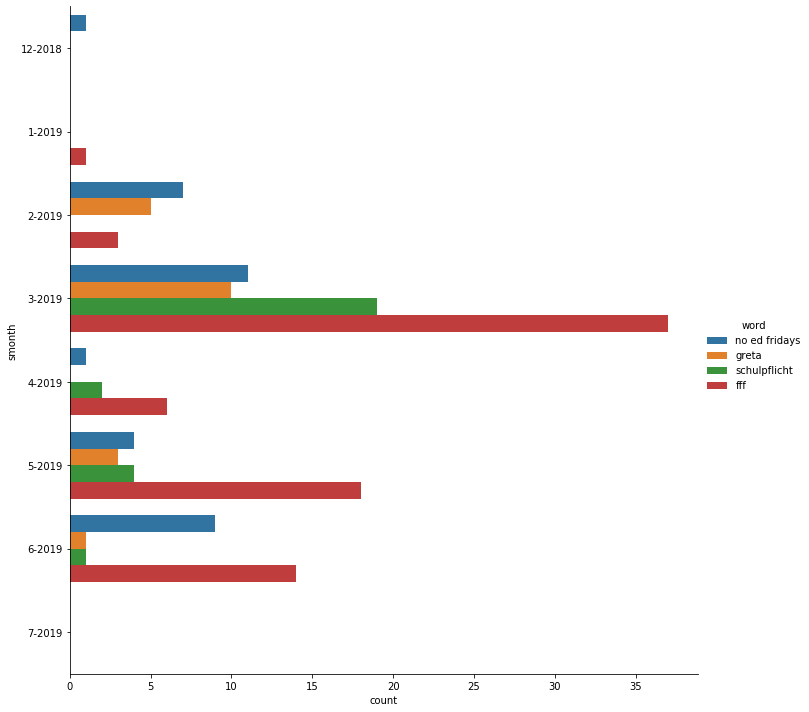

In [82]:
df_filter = df.copy()
for word in ["annegret"]:
    df_filter = df_filter.loc[df_filter.word != word]
sns.catplot(data=df_filter, y="smonth", x="count", hue="word", orient="h", kind="bar", height=10, ci=None, estimator=sum)
plt.show()

In [61]:
df.loc[df["count"] != 0]

,date,sdate,smonth,day,year,month,word,count
nr,,,,,,,,
72,2018-12-14,14.12.2018,12-2018,14,2018,12,no ed fridays,1
75,2019-01-18,18.01.2019,1-2019,18,2019,1,fff,1
78,2019-02-01,01.02.2019,2-2019,1,2019,2,greta,1
79,2019-02-13,13.02.2019,2-2019,13,2019,2,no ed fridays,6
79,2019-02-13,13.02.2019,2-2019,13,2019,2,greta,4
79,2019-02-13,13.02.2019,2-2019,13,2019,2,fff,1
80,2019-02-14,14.02.2019,2-2019,14,2019,2,fff,2
83,2019-02-21,21.02.2019,2-2019,21,2019,2,no ed fridays,1
85,2019-03-13,13.03.2019,3-2019,13,2019,3,fff,1
